In [0]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define transformations for the train set
train_transformations = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32,padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])
trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True,transform=train_transformations)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

Extracting ./data/cifar-100-python.tar.gz to ./data


In [3]:
# Define transformations for the test set
test_transformations = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

])

testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True,transform=test_transformations)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

Files already downloaded and verified


In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
#converting into an iterable object
trainiter = iter(trainloader)
testiter = iter(testloader)

<class 'torch.Tensor'>
torch.Size([64, 3, 32, 32])
torch.Size([64])
25


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


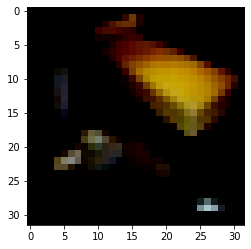

In [6]:
#Analyzing one sample and display one particular image
image, label = trainiter.next()
print(type(image))
print(image.size())
print(label.size())

img = image[0,:].numpy();
img=np.transpose(img,(1,2,0))
l=label[0].numpy()
print(l)
plt.imshow(img)

In [0]:
class Unit(nn.Module):
    def __init__(self,in_channels,out_channels,is_bn=True):
        super(Unit,self).__init__()
        self.is_bn = is_bn
        

        self.conv = nn.Conv2d(in_channels=in_channels,kernel_size=3,out_channels=out_channels,stride=1,padding=1)
        # nn.init.xavier_uniform(self.conv.weight)
        if self.is_bn:
            self.bn = nn.BatchNorm2d(num_features=out_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self,input):
        output = self.conv(input)
        if self.is_bn:
            output = self.bn(output)
        output = self.relu(output)

        return output

In [0]:
class Model1(nn.Module):
    def __init__(self,num_classes=100,is_bn=True):
        super(Model1,self).__init__()

        self.unit1 = Unit(in_channels=3,out_channels=64,is_bn=is_bn)
        self.unit2 = Unit(in_channels=64,out_channels=64,is_bn=is_bn)
        
        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.unit3 = Unit(in_channels=64,out_channels=128,is_bn=is_bn)
        self.unit4 = Unit(in_channels=128,out_channels=128,is_bn=is_bn)
        
        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.unit5 = Unit(in_channels=128,out_channels=256,is_bn=is_bn)
        self.unit6 = Unit(in_channels=256,out_channels=256,is_bn=is_bn)
        
        self.pool3 = nn.MaxPool2d(kernel_size=2)

        self.unit7 = Unit(in_channels=256,out_channels=512,is_bn=is_bn)
        self.unit8 = Unit(in_channels=512,out_channels=512,is_bn=is_bn)
        
        self.pool4 = nn.MaxPool2d(kernel_size=2)

        self.unit9 = Unit(in_channels=512,out_channels=512,is_bn=is_bn)
        self.unit10 = Unit(in_channels=512,out_channels=512,is_bn=is_bn)
        
        self.pool5 = nn.MaxPool2d(kernel_size=2)


        self.net = nn.Sequential(
            self.unit1,
            self.unit2,
            self.pool1,
            self.unit3,
            self.unit4,
            self.pool2,
            self.unit5,
            self.unit6,
            self.pool3,
            self.unit7,
            self.unit8,
            self.pool4,
            self.unit9,
            self.unit10,
            self.pool5,
        )

        self.classifier = nn.Sequential(
            nn.Linear(512, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, input):
        output = self.net(input)
        output = output.view(output.size()[0], -1)
        output = self.classifier(output)
        return output

In [0]:
class Model2(nn.Module):
    def __init__(self,num_classes=100):
        super(Model2,self).__init__()

        self.unit1 = Unit(in_channels=3,out_channels=64)
        
        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.unit2 = Unit(in_channels=64,out_channels=128)
        
        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.unit3 = Unit(in_channels=128,out_channels=256)
        self.unit4 = Unit(in_channels=256,out_channels=256)
        
        self.pool3 = nn.MaxPool2d(kernel_size=2)

        self.unit5 = Unit(in_channels=256,out_channels=512)
        self.unit6 = Unit(in_channels=512,out_channels=512)
        
        self.pool4 = nn.MaxPool2d(kernel_size=2)

        self.unit7 = Unit(in_channels=512,out_channels=512)
        self.unit8 = Unit(in_channels=512,out_channels=512)
        
        self.pool5 = nn.MaxPool2d(kernel_size=2)


        self.net = nn.Sequential(
            self.unit1,
            self.pool1,
            self.unit2,
            self.pool2,
            self.unit3,
            self.unit4,
            self.pool3,
            self.unit5,
            self.unit6,
            self.pool4,
            self.unit7,
            self.unit8,
            self.pool5,
        )

        self.classifier = nn.Sequential(
            nn.Linear(512, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, input):
        output = self.net(input)
        output = output.view(output.size()[0], -1)
        output = self.classifier(output)
        return output

In [0]:
class Model3(nn.Module):
    def __init__(self,num_classes=100):
        super(Model3,self).__init__()

        self.unit1 = Unit(in_channels=3,out_channels=64)
        
        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.unit2 = Unit(in_channels=64,out_channels=128)
        
        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.unit3 = Unit(in_channels=128,out_channels=256)
        
        self.pool3 = nn.MaxPool2d(kernel_size=2)

        self.unit4 = Unit(in_channels=256,out_channels=512)
        
        self.pool4 = nn.MaxPool2d(kernel_size=2)

        self.unit5 = Unit(in_channels=512,out_channels=512)
        
        self.pool5 = nn.MaxPool2d(kernel_size=2)


        self.net = nn.Sequential(
            self.unit1,
            self.pool1,
            self.unit2,
            self.pool2,
            self.unit3,
            self.pool3,
            self.unit4,
            self.pool4,
            self.unit5,
            self.pool5,
        )

        self.classifier = nn.Sequential(
            nn.Linear(512, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, input):
        output = self.net(input)
        output = output.view(output.size()[0], -1)
        output = self.classifier(output)
        return output

In [0]:
def adjust_learning_rate(optimizer, epoch):
    lr = 0.001

    if epoch > 180:
        lr = lr / 1000000
    elif epoch > 150:
        lr = lr / 100000
    elif epoch > 120:
        lr = lr / 10000
    elif epoch > 90:
        lr = lr / 1000
    elif epoch > 60:
        lr = lr / 100
    elif epoch > 30:
        lr = lr / 10

    for param_group in optimizer.param_groups:
        param_group["lr"] = lr

def correct(groundTruth,output):
  assert groundTruth.size(0) == output.size(0)
  _, indices = torch.max(output, 1)
  ch=torch.eq(groundTruth,indices)
  return torch.sum(ch).item()
  
def train(net, nepochs, criterion, optimizer, batchSize):   
  trainAcc=[];testAcc=[];
  trainLoss=[];testLoss=[];

  totalTrainSamples=len(trainloader.dataset)
  print("Total training samples :", totalTrainSamples)
  totalTestSamples=len(testloader.dataset);
  print("Total testing samples :", totalTestSamples)

  for epoch in range(nepochs):

      #TRAINING
      running_loss_train = 0.0
      numCorr_train=0;
      net.train()
      
      for i, data in enumerate(trainloader, 0):  
          inputs, labels = data[0].to(device), data[1].to(device)
          optimizer.zero_grad()
          outputs = net(inputs)
          numCorr_train+=correct(labels,outputs)      
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          running_loss_train += loss.item()
                
      trainAcc.append((numCorr_train/totalTrainSamples)*100)
      trainLoss.append(running_loss_train/totalTrainSamples)

      adjust_learning_rate(optimizer=optimizer, epoch=epoch)
      
      #TESTING
      net.eval()
      running_loss_test = 0.0
      numCorr_test=0;
      for i, data in enumerate(testloader, 0):
          inputs, labels = data[0].to(device), data[1].to(device)
          outputs = net(inputs)
          numCorr_test+=correct(labels,outputs)
          loss = criterion(outputs, labels)      
          running_loss_test += loss.item()
      
      testAcc.append((numCorr_test/totalTestSamples)*100)
      testLoss.append(running_loss_test/totalTestSamples)

      print("Epoch: {} | Train Loss: {} | Train Accuracy: {}% | Test Loss: {} | Test Accuracy: {}%".format(epoch, running_loss_train/totalTrainSamples, round((numCorr_train/totalTrainSamples)*100,2), running_loss_test/totalTestSamples, round((numCorr_test/totalTestSamples)*100,2)))
      if epoch % 20 == 0:
        torch.save(net.state_dict(), 'checkpoint_{}.pth'.format(epoch))

  return net, trainAcc, testAcc, trainLoss, testLoss

In [12]:
print("Model{} with {} initialization {} and {} Loss {} Batch Normalisation".format(1, 'Uniform Xavier', 'Adaptive Learning Rate', 'Cross Entropy', 'No'))
net_nbn = Model1(100,is_bn=False)
net_nbn.to(device)
criterion = nn.CrossEntropyLoss()
momentum=0.09
nepochs=50
optimizer=optim.Adam(net_nbn.parameters(), lr=0.001, weight_decay=0.0001)
batchSize=128

net_nbn, trainAcc_nbn, testAcc_nbn, trainLoss_nbn, testLoss_nbn = train(net=net_nbn, nepochs=nepochs, criterion=criterion, optimizer=optimizer, batchSize=batchSize)

Model1 with Uniform Xavier initialization Adaptive Learning Rate and Cross Entropy Loss No Batch Normalisation
Total training samples : 50000
Total testing samples : 10000
Epoch: 0 | Train Loss: 0.0720459204864502 | Train Accuracy: 0.9% | Test Loss: 0.0723020357131958 | Test Accuracy: 1.0%
Epoch: 1 | Train Loss: 0.07203625169754029 | Train Accuracy: 0.91% | Test Loss: 0.07230142841339111 | Test Accuracy: 1.0%
Epoch: 2 | Train Loss: 0.07203681594848632 | Train Accuracy: 0.93% | Test Loss: 0.07230636191368103 | Test Accuracy: 1.0%
Epoch: 3 | Train Loss: 0.07203734240531921 | Train Accuracy: 0.9% | Test Loss: 0.07230163855552674 | Test Accuracy: 1.0%
Epoch: 4 | Train Loss: 0.0720377111530304 | Train Accuracy: 0.98% | Test Loss: 0.07230240831375122 | Test Accuracy: 1.0%
Epoch: 5 | Train Loss: 0.07204079407691956 | Train Accuracy: 0.89% | Test Loss: 0.07230418424606323 | Test Accuracy: 1.0%
Epoch: 6 | Train Loss: 0.07204271147727967 | Train Accuracy: 0.94% | Test Loss: 0.07230243282318115 |

F1: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
Precision: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
Recall: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
Accuracy of the network on the 10000 test images: 0 %


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


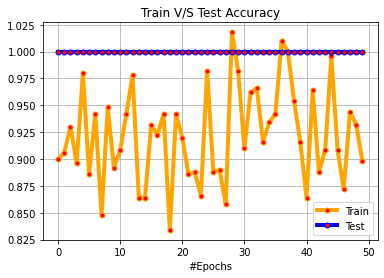

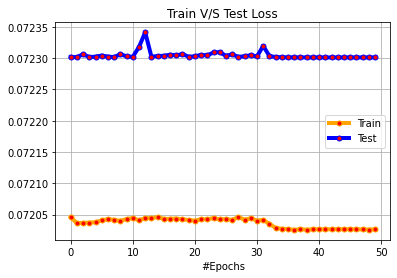

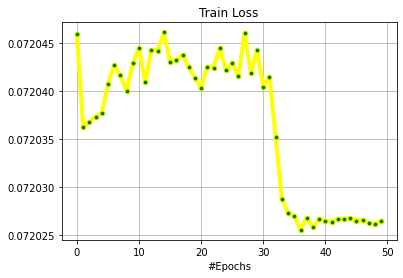

In [14]:
import matplotlib.pyplot as plt

fig1, ax1=  plt.subplots()
plt.grid()
ax1.plot(trainAcc_nbn,marker='o', markerfacecolor='red', markersize=5, color='orange', linewidth=4)
ax1.plot(testAcc_nbn,marker='o', markerfacecolor='red', markersize=5, color='blue', linewidth=4)
plt.gca().legend(('Train','Test'))
ax1.set_title("Train V/S Test Accuracy")
ax1.set_xlabel("#Epochs")

fig2, ax2=  plt.subplots()
plt.grid()
ax2.plot(trainLoss_nbn,marker='o', markerfacecolor='red', markersize=5, color='orange', linewidth=4,label="Train Loss")
ax2.plot(testLoss_nbn,marker='o', markerfacecolor='red', markersize=5, color='blue', linewidth=4,label="Test Loss")
plt.gca().legend(('Train','Test'))
ax2.set_title("Train V/S Test Loss")
ax2.set_xlabel("#Epochs")

fig3, ax3=  plt.subplots()
plt.grid()
ax3.plot(trainLoss_nbn,marker='o', markerfacecolor='green', markersize=5, color='yellow', linewidth=4,label="Train Loss")
ax3.set_title("Train Loss")
ax3.set_xlabel("#Epochs")

from sklearn.metrics import precision_recall_fscore_support, f1_score, precision_score, recall_score

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net_nbn(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        images = images.cpu()
        labels = labels.cpu()
        predicted = predicted.cpu()
        print('F1: {}'.format(f1_score(labels, predicted, average=None)))
        print('Precision: {}'.format(precision_score(labels, predicted,average=None)))
        print('Recall: {}'.format(recall_score(labels, predicted,average=None)))
        break

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))